In [2]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
df_agri=pd.read_csv("train_agri.csv")

In [4]:
df_agri.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [5]:
df_agri["Crop_Damage"].value_counts()

0    3820
1     664
2     115
Name: Crop_Damage, dtype: int64

In [6]:
df_agri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4157 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


In [7]:
#filling missing values
df_agri["Number_Weeks_Used"]=df_agri["Number_Weeks_Used"].fillna(df_agri["Number_Weeks_Used"].median())

In [8]:
m=df_agri.columns
for i in m:
    print(i,":",df_agri[i].unique())
    print("\n")
    print("*****************************************************************************************************")

ID : ['F00000001' 'F00000003' 'F00000004' ... 'F00008080' 'F00008082'
 'F00008083']


*****************************************************************************************************
Estimated_Insects_Count : [ 188  209  257  342  448  577  731 1132 1212 1575 1785 2138 2401 2999
 3516 3895 4096  150  151  168  232  231  256  283  312  311  375  411
  410  488  489  531  626  625  677  732  789  790  851  850  915  916
  984 1056 1296 1297 1385 1478 1576 1678 1786 1898 2015 2016 2139 2267
 2402 2542 2541 2688 2687 2840 3164 3165 3336 3337 3702 3896  169 3515
 4097]


*****************************************************************************************************
Crop_Type : [1 0]


*****************************************************************************************************
Soil_Type : [0 1]


*****************************************************************************************************
Pesticide_Use_Category : [1 3 2]


*****************************************

In [9]:
df_agri.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.805392,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,11.968667,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,36.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


0    3820
1     664
2     115
Name: Crop_Damage, dtype: int64


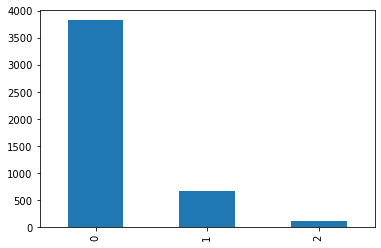

In [10]:
df_agri.Crop_Damage.value_counts().plot(kind = "bar")
print(df_agri["Crop_Damage"].value_counts())

Observation: 

1. 0 indicates crop alive and has the highest value
2. 1 indicates crop damaged due to other causes 
3. 2 indicates crop damaged due to pesticide and it is least

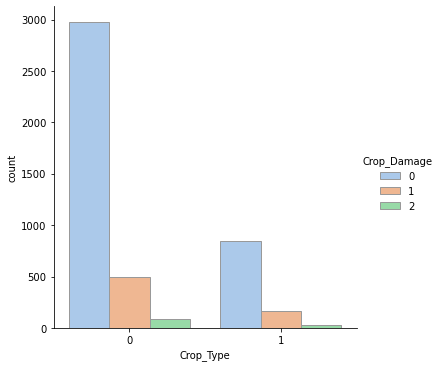

In [11]:
sns.catplot(x="Crop_Type", hue="Crop_Damage", kind="count",
            palette="pastel", edgecolor=".6",
            data=df_agri)

Observation:
    
1. For crop-type 0 ,most of the crops are alive and very less crops died due to pesticide
2. For crop-type 1,same as crop type 0

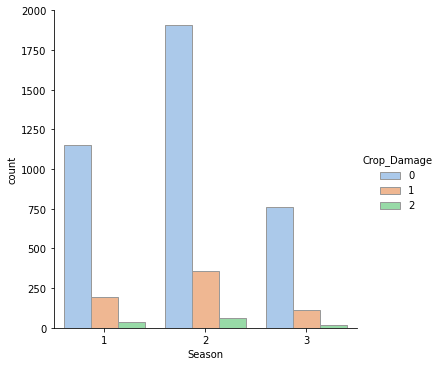

In [12]:
sns.catplot(x="Season", hue="Crop_Damage", kind="count",
            palette="pastel", edgecolor=".6",
            data=df_agri)

Observation: Maximum output during season 2

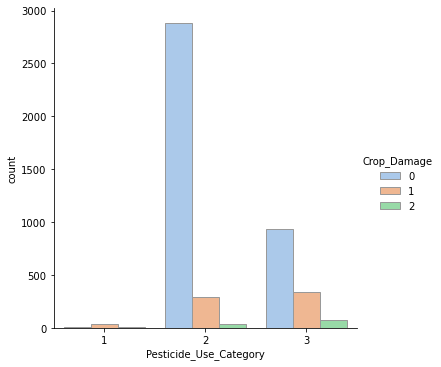

In [13]:
sns.catplot(x="Pesticide_Use_Category", hue="Crop_Damage", kind="count",
            palette="pastel", edgecolor=".6",
            data=df_agri)

Observation:

1. For pesticide type1 ,there are no crops alive.
2. For pesticide type2, there are alive crops maximum


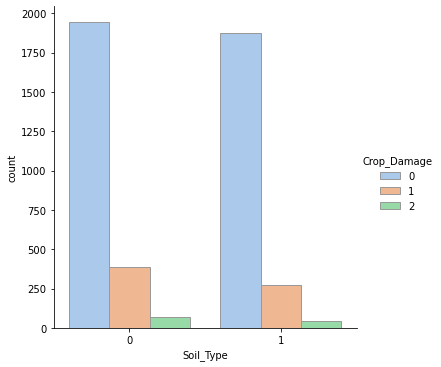

In [14]:
sns.catplot(x="Soil_Type", hue="Crop_Damage", kind="count",
            palette="pastel", edgecolor=".6",
            data=df_agri)

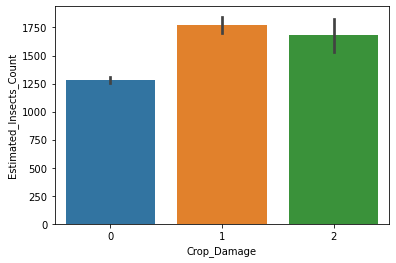

In [15]:
sns.barplot(x="Crop_Damage",y="Estimated_Insects_Count",data=df_agri)


Observation:
    
Estimated_Insects_Count is maximum for 1 followed by 2 and least for 0. As 0 refers to alive crops has less insect count


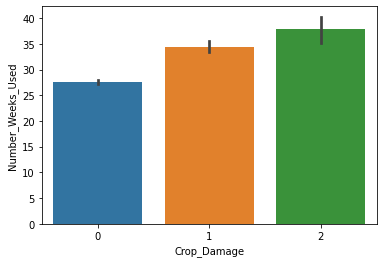

In [16]:
sns.barplot(x="Crop_Damage",y="Number_Weeks_Used",data=df_agri)


<Figure size 2160x1440 with 0 Axes>

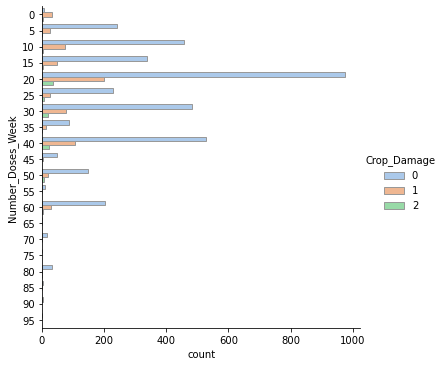

In [17]:
plt.figure(figsize=(30,20))
sns.catplot(y="Number_Doses_Week", hue="Crop_Damage", kind="count",
            palette="pastel", edgecolor=".6",
            data=df_agri)

Observtion:
    
  Maximum crop-damage for number_doses_week =20 and minimum for 80


In [18]:
corr_matrix=df_agri.corr()
corr_matrix["Crop_Damage"].sort_values(ascending=False)

Crop_Damage                1.000000
Number_Weeks_Used          0.231439
Estimated_Insects_Count    0.202312
Pesticide_Use_Category     0.199195
Crop_Type                  0.021772
Season                    -0.016196
Number_Doses_Week         -0.018363
Soil_Type                 -0.059481
Number_Weeks_Quit         -0.152918
Name: Crop_Damage, dtype: float64

Text(0.5, 1.0, 'Coorelation with target variable')

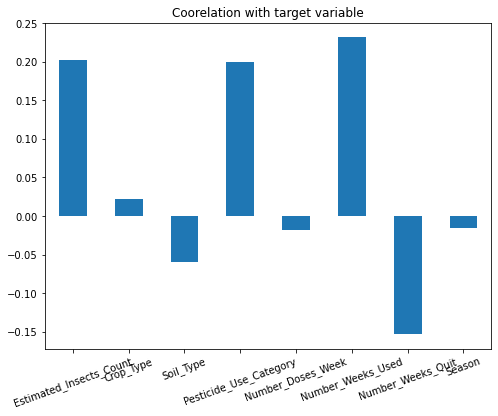

In [19]:
plt.figure(figsize=(8,6))
df_agri.drop("Crop_Damage",axis=1).corrwith(df_agri["Crop_Damage"]).plot(kind="bar")
plt.xticks(rotation=20)
plt.title("Coorelation with target variable")

Observation:
    
1. Season,Number_Doses_Week,Soil_Type ,Number_Weeks_Quit have neggative correlation.
2. Number_Weeks_Used,Estimated_Insects_Count,Pesticide_Use_Category,Crop_Type have positive correlation. Also Number_Weeks_Used has the maximum correlation

In [20]:
df_agri.drop("ID",axis=1,inplace=True)

In [21]:
df_agri["Crop_Damage"].value_counts()

0    3820
1     664
2     115
Name: Crop_Damage, dtype: int64

In [22]:
df_agri.skew()


Estimated_Insects_Count    0.911469
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.678586
Number_Doses_Week          0.945895
Number_Weeks_Used          0.299898
Number_Weeks_Quit          0.919771
Season                     0.144841
Crop_Damage                2.306933
dtype: float64

We will be treating skewness after droping Crop_Damage as there are only two highly skewed data 
 1. Crop_Type for this we will use autotransform
 2. Crop_damage we will use under sampling method

In [23]:
from scipy import stats
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df_agri))
threshold=3
new_df=df_agri[(z < 3).all(axis=1)]
#removing outliers
print(new_df.shape,"  ",df_agri.shape)
#after remving outliers all the rows with class value 2 dropped so we are not using outlier removal

(4370, 9)    (4599, 9)


In [24]:
new_df["Crop_Damage"].value_counts()

0    3731
1     639
Name: Crop_Damage, dtype: int64

In [25]:
x_d=df_agri.drop("Crop_Damage",axis=1)
y=df_agri["Crop_Damage"]

In [26]:
x_d.skew()

Estimated_Insects_Count    0.911469
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.678586
Number_Doses_Week          0.945895
Number_Weeks_Used          0.299898
Number_Weeks_Quit          0.919771
Season                     0.144841
dtype: float64

In [27]:
from sklearn.preprocessing import power_transform
x_sk=power_transform(x_d,method="yeo-johnson")
new_x=pd.DataFrame(x_sk,columns=x_d.columns)

In [28]:
new_x.skew()

Estimated_Insects_Count   -0.032846
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category    -0.047595
Number_Doses_Week          0.008110
Number_Weeks_Used         -0.005302
Number_Weeks_Quit         -0.089868
Season                    -0.042471
dtype: float64

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import f1_score
from sklearn import svm  
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split

In [30]:
x_d.shape

(4599, 8)

In [31]:
y.shape


(4599,)

In [32]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
smk=SMOTETomek(random_state=42)
x_re,y_re=smk.fit_sample(new_x,y)
from collections import Counter
print(format(Counter(y)))
print(format(Counter(y_re)))

Counter({0: 3820, 1: 664, 2: 115})
Counter({2: 3772, 0: 3660, 1: 3654})


In [33]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_re)
x=sc.transform(x_re)
x=pd.DataFrame(x,columns=x_re.columns)

In [34]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(x,y_re,random_state = 47,test_size=0.20)


In [35]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import f1_score
from sklearn import svm  
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score

from sklearn.metrics import recall_score

In [36]:
model=[DecisionTreeClassifier(),svm.SVC(),KNeighborsClassifier(),GradientBoostingClassifier()]
for m in model:
    m.fit(X_train,Y_train)
    predm=m.predict(X_test)
    print("Score of",m,"is",accuracy_score(Y_test,predm))
    print("Cross val score:",cross_val_score(m,x,y_re,cv=3,scoring="accuracy").mean())
    print("\n")
   

Score of DecisionTreeClassifier() is 0.8119927862939585
Cross val score: 0.7862168221944947


Score of SVC() is 0.6767357980162308
Cross val score: 0.6351262479814578


Score of KNeighborsClassifier() is 0.8507664562669072
Cross val score: 0.7849527314513782


Score of GradientBoostingClassifier() is 0.7488728584310189
Cross val score: 0.7283078708992106




In [37]:
from sklearn.model_selection import GridSearchCV
model=KNeighborsClassifier()
params = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}
model1 = GridSearchCV(model, param_grid=params, n_jobs=1)
model1.fit(x,y_re)
print("Best Hyper Parameters:\n",model1.best_params_)
#hyperparameter tuning for better score

Best Hyper Parameters:
 {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 5, 'weights': 'distance'}


In [38]:
#Now using the hyper parameters 
knn=KNeighborsClassifier(algorithm= 'auto', leaf_size= 1, n_jobs= -1, n_neighbors= 5, weights= 'distance')
knn.fit(X_train,Y_train)
ypred=knn.predict(X_test)
print("Accuracy score is:",accuracy_score(Y_test,ypred))
print("F1 score is:",f1_score(Y_test,ypred,average='macro'))
print('Precision score is:',precision_score(Y_test, ypred, average='macro'))
print("Recall score is:",recall_score(Y_test,ypred,average="macro"))


Accuracy score is: 0.8719567177637512
F1 score is: 0.8673548404294312
Precision score is: 0.8840823256915146
Recall score is: 0.8697794362205729


In [39]:
test=pd.read_csv("test_agri.csv")

In [40]:
test.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [41]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1199 non-null   object 
 1   Estimated_Insects_Count  1199 non-null   int64  
 2   Crop_Type                1199 non-null   int64  
 3   Soil_Type                1199 non-null   int64  
 4   Pesticide_Use_Category   1199 non-null   int64  
 5   Number_Doses_Week        1199 non-null   int64  
 6   Number_Weeks_Used        1080 non-null   float64
 7   Number_Weeks_Quit        1199 non-null   int64  
 8   Season                   1199 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 84.4+ KB


In [42]:
test["Number_Weeks_Used"]=test["Number_Weeks_Used"].fillna(test["Number_Weeks_Used"].median())

In [43]:
test.drop("ID",axis=1,inplace=True)

In [50]:
test.skew()

Estimated_Insects_Count    1.098665
Crop_Type                  1.546968
Soil_Type                  0.179422
Pesticide_Use_Category     0.089675
Number_Doses_Week          0.872028
Number_Weeks_Used          0.245465
Number_Weeks_Quit          1.191013
Season                     0.155872
dtype: float64

In [51]:
from sklearn.preprocessing import power_transform
test_sk=power_transform(test,method="yeo-johnson")
test_sk=pd.DataFrame(test_sk,columns=test.columns)

In [53]:
test_sk.skew()

Estimated_Insects_Count   -0.016231
Crop_Type                  1.546968
Soil_Type                  0.179422
Pesticide_Use_Category    -0.020323
Number_Doses_Week         -0.006111
Number_Weeks_Used         -0.010228
Number_Weeks_Quit          0.115384
Season                    -0.040124
dtype: float64

In [54]:
from scipy import stats
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(test_sk))
threshold=3
new_test=test_sk[(z < 3).all(axis=1)]
#removing outliers
print(new_test.shape,"  ",test_sk.shape)
#no outliers found

(1199, 8)    (1199, 8)


In [60]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(test_sk)
x_test=sc.transform(test_sk)
x_test=pd.DataFrame(x_test,columns=test_sk.columns)
#scaling the input 

In [61]:
knn=KNeighborsClassifier(algorithm= 'auto', leaf_size= 1, n_jobs= -1, n_neighbors= 5, weights= 'distance')
knn.fit(X_train,Y_train)
pred=knn.predict(x_test)
#fitting the dataset and predicting

In [62]:
pred

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [63]:
df_test=pd.DataFrame(pred)
df_test.to_csv("agri_predict.csv")

In [64]:
df_test[0].value_counts()

0    581
1    442
2    176
Name: 0, dtype: int64

In [65]:
import joblib
joblib.dump(knn,"agri_ouput.pkl")

['agri_ouput.pkl']